In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = 'C:/Users/sasch/PycharmProjects/hw_8/names/'

In [3]:
#task 1
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(data_path, year),
                                      names=['Name','Gender','Count']
                                      )
names_all = pd.concat(names_by_year, names=['Year'])
names_all.head(10)

Name Gender  Count
Year                           
1900 0       Mary      F  16706
     1      Helen      F   6343
     2       Anna      F   6114
     3   Margaret      F   5304
     4       Ruth      F   4765
     5  Elizabeth      F   4096
     6   Florence      F   3920
     7      Ethel      F   3896
     8      Marie      F   3856
     9    Lillian      F   3414

In [4]:
names_sum = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
names_sum.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

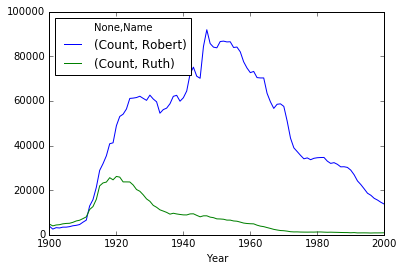

In [5]:
names_sum.query('Name == ["Ruth", "Robert"]', engine='python').unstack('Name').plot()

In [6]:
#task 2
names_by_year_t2 = {}
for year in range(1900, 2001, 5):
    names_by_year_t2[year] = pd.read_csv('{}/yob{}.txt'.format(data_path, year),
                                      names=['Name','Gender','Count']
                                      )
names_all_t2 = pd.concat(names_by_year_t2, names=['Year'])

In [7]:
names_sum_t2 = names_all_t2.groupby(level=0).sum()
names_sum_t2.head(10)

,Count
Year,
1900,450296
1905,423937
1910,590717
1915,1832472
1920,2262705
1925,2333334
1930,2223111
1935,2089571
1940,2302361


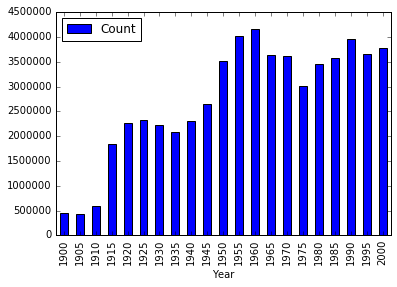

In [8]:
names_sum_t2.plot.bar()

In [9]:
#task 3
names_1950 = pd.read_csv('{}/yob1950.txt'.format(data_path), names=['Name','Gender','Count'])

In [10]:
names_1950_R = names_1950[(names_1950.Name.str.startswith('R'))].groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_1950_R

,Count
Name,
Robert,83778
Richard,51111
Ronald,29985
Roger,12578
Raymond,11218
Rebecca,9443
Ruth,7138
Roy,6491
Rita,6439


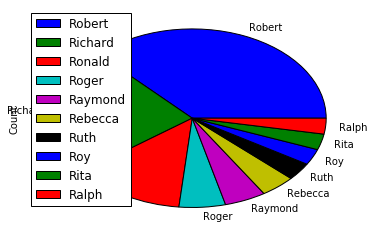

In [11]:
names_1950_R.plot.pie(y='Count')

In [12]:
#task 4
names_sum_t4 = names_all.groupby('Name').sum().reset_index()
names_sum_t4.head(10)

,Name,Count
0,Aadam,58
1,Aadarsh,5
2,Aadil,80
3,Aaditya,30
4,Aage,7
5,Aagot,5
6,Aahil,6
7,Aailiyah,5
8,Aailyah,36
9,Aaisha,83


In [13]:
def count_to_consonants(row):
    vowels = 0
    for name in row.Name.lower():
        for i in name:
            if (i == 'a' or i == 'e' or i == 'i' or i == 'o' or i == 'u' or i == 'y'):
                vowels += 1
    return len(row.Name)-vowels
names_sum_t4['Consonants'] = names_sum_t4.apply(count_to_consonants, axis=1)
names_sum_t4.head(10)

,Name,Count,Consonants
0,Aadam,58,2
1,Aadarsh,5,4
2,Aadil,80,2
3,Aaditya,30,2
4,Aage,7,1
5,Aagot,5,2
6,Aahil,6,2
7,Aailiyah,5,2
8,Aailyah,36,2
9,Aaisha,83,2


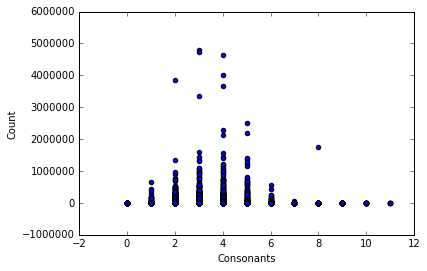

In [14]:
names_sum_t4.plot.scatter(x='Consonants', y='Count')